# Reviews Data Analysis

This notebook analyzes the reviews data from `reviews_rag_2000.csv` to gain insights into:
- Rating distribution
- Event type popularity
- Location-based patterns
- Sentiment analysis
- Common themes and keywords
- Temporal trends


In [ ]:
# Import required libraries
# Check if packages are installed first
missing_packages = []
try:
    import pandas as pd
except ImportError:
    missing_packages.append("pandas")
try:
    import numpy as np
except ImportError:
    missing_packages.append("numpy")
try:
    import matplotlib.pyplot as plt
except ImportError:
    missing_packages.append("matplotlib")
try:
    import seaborn as sns
except ImportError:
    missing_packages.append("seaborn")

if missing_packages:
    print(f"Missing packages: {', '.join(missing_packages)}")
    print(f"Install with: pip install {' '.join(missing_packages)}")
    raise ImportError(f"Please install: {', '.join(missing_packages)}")

# All imports successful
import re
from collections import Counter
from datetime import datetime
import os
from pathlib import Path

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Get project root directory
current_dir = os.getcwd()
if os.path.basename(current_dir) == "notebooks":
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

csv_path = os.path.join(project_root, "documents", "Reviews", "reviews_rag_2000.csv")
print(f"✓ All packages loaded successfully")
print(f"Loading reviews from: {csv_path}")


✓ All packages loaded successfully
Loading reviews from: /Users/adipole/github/ai_portfolio/event_recommendation/documents/Reviews/reviews_rag_2000.csv


In [3]:
# Load the CSV file
df = pd.read_csv(csv_path)

# Display basic info
print(f"Total reviews: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()


Total reviews: 2000

Columns: ['created_at', 'Unnamed: 1', 'rating', 'review_text']

First few rows:


,created_at,Unnamed: 1,rating,review_text
0,2026-02-17,NaN,5,"If you're in Lexington, try BEGINNER COOKING a..."
1,2026-01-29,NaN,1,POWER HOUR at Summit Reach YMCA in Pittsfield ...
2,2026-02-26,NaN,5,"If you're in Framingham, try SALSA / LATIN DAN..."
3,2026-01-14,NaN,3,BEGINNER DRAWING at Harborlight YMCA in Salem ...
4,2026-04-08,NaN,4,Riverstone YMCA nailed it with SENIOR CIRCUITS...


In [4]:
# Data cleaning and preprocessing
# Remove empty column if exists
df = df.dropna(axis=1, how='all')

# Convert rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Parse dates
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Extract event type and location from review text
def extract_event_type(text):
    if pd.isna(text):
        return None
    # Pattern: UPPERCASE WORDS before "at"
    match = re.search(r'([A-Z][A-Z\s/]+?)\s+at\s+', str(text))
    return match.group(1).strip() if match else None

def extract_location(text):
    if pd.isna(text):
        return None
    # Pattern: "at CITY YMCA" or "in CITY"
    match = re.search(r'(?:at|in)\s+([A-Z][a-z]+(?:\s+[A-Z][a-z]+)?)\s+YMCA', str(text))
    if match:
        return match.group(1).strip()
    # Try alternative pattern
    match = re.search(r'in\s+([A-Z][a-z]+)', str(text))
    return match.group(1).strip() if match else None

df['event_type'] = df['review_text'].apply(extract_event_type)
df['location'] = df['review_text'].apply(extract_location)

print(f"\nData shape: {df.shape}")
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nSample with extracted fields:")
df[['rating', 'event_type', 'location', 'review_text']].head(10)



Data shape: (2000, 5)

Missing values:
created_at       0
rating           0
review_text      0
event_type     856
location       562
dtype: int64

Sample with extracted fields:


,rating,event_type,location,review_text
0,5,BEGINNER COOKING,Pinecrest,"If you're in Lexington, try BEGINNER COOKING a..."
1,1,POWER HOUR,Summit Reach,POWER HOUR at Summit Reach YMCA in Pittsfield ...
2,5,None,Framingham,"If you're in Framingham, try SALSA / LATIN DAN..."
3,3,BEGINNER DRAWING,Harborlight,BEGINNER DRAWING at Harborlight YMCA in Salem ...
4,4,None,None,Riverstone YMCA nailed it with SENIOR CIRCUITS...
5,4,SKETCHING,Seabrook Commons,Took SKETCHING at Seabrook Commons YMCA (Plymo...
6,1,CARDIO DANCE,Pinecrest,Not a great session of CARDIO DANCE at Pinecre...
7,3,CARDIO STRENGTH,Seabrook Commons,CARDIO STRENGTH at Seabrook Commons YMCA in Pl...
8,4,BOOT CAMP,Summit Reach,Loved BOOT CAMP at Summit Reach YMCA in Pittsf...
9,5,AQUA PILATES,Summit Reach,Big fan of AQUA PILATES at Summit Reach YMCA. ...


## 1. Rating Distribution Analysis


Rating Distribution:
1 stars: 476 reviews (23.8%)
2 stars: 391 reviews (19.6%)
3 stars: 235 reviews (11.8%)
4 stars: 352 reviews (17.6%)
5 stars: 546 reviews (27.3%)


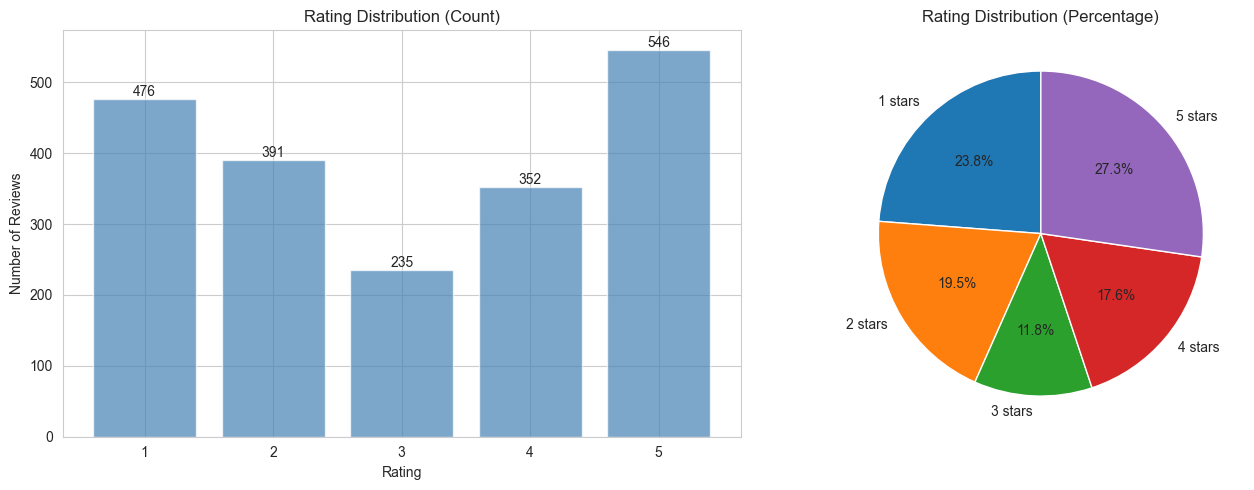


Average Rating: 3.05
Median Rating: 3.00


In [5]:
# Rating distribution
rating_counts = df['rating'].value_counts().sort_index()
rating_pct = df['rating'].value_counts(normalize=True).sort_index() * 100

print("Rating Distribution:")
for rating in sorted(rating_counts.index):
    print(f"{rating} stars: {rating_counts[rating]} reviews ({rating_pct[rating]:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(rating_counts.index, rating_counts.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Reviews')
axes[0].set_title('Rating Distribution (Count)')
axes[0].set_xticks(sorted(rating_counts.index))
for i, v in enumerate(rating_counts.values):
    axes[0].text(rating_counts.index[i], v, str(v), ha='center', va='bottom')

# Pie chart
axes[1].pie(rating_counts.values, labels=[f"{r} stars" for r in rating_counts.index], 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Rating Distribution (Percentage)')

plt.tight_layout()
plt.show()

print(f"\nAverage Rating: {df['rating'].mean():.2f}")
print(f"Median Rating: {df['rating'].median():.2f}")


## 2. Event Type Analysis


Total unique event types: 19

Top 20 Event Types by Review Count:
event_type
ARTHRITIS AQUA FITNESS    75
STRENGTH                  72
SALSA / LATIN DANCE       71
AQUA ZUMBA                71
SENIOR CIRCUITS           71
BEGINNER DRAWING          69
SKETCHING                 69
CARDIO STRENGTH           68
AQUA PILATES              67
BOOT CAMP BURN            61
AQUA FIT                  60
BEGINNER COOKING          60
POWER HOUR                56
LINE DANCING              52
CARDIO DANCE              52
AQUA CARDIO               51
BOOT CAMP                 50
HEALTHY COOKING           44
AQUA INTERVALS            25
Name: count, dtype: int64

Top 20 Event Types by Review Count with Average Ratings:
                        avg_rating  review_count
event_type                                      
ARTHRITIS AQUA FITNESS    2.840000            75
STRENGTH                  3.097222            72
AQUA ZUMBA                3.084507            71
SENIOR CIRCUITS           3.098592         

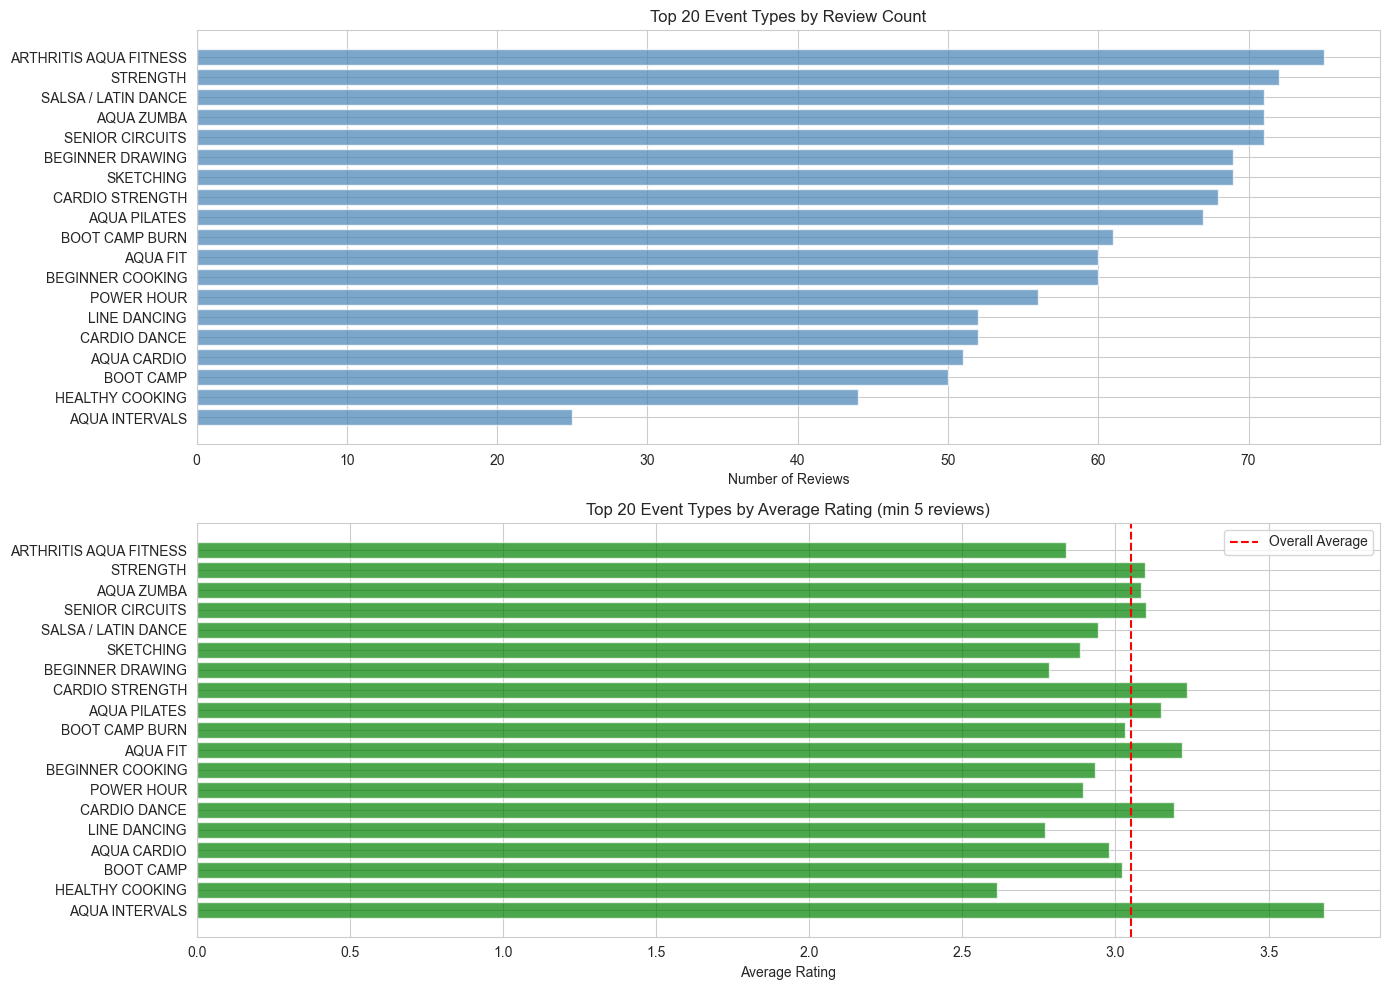

In [6]:
# Event type analysis
event_type_counts = df['event_type'].value_counts().head(20)

print(f"Total unique event types: {df['event_type'].nunique()}")
print(f"\nTop 20 Event Types by Review Count:")
print(event_type_counts)

# Average rating by event type
event_ratings = df.groupby('event_type')['rating'].agg(['mean', 'count']).sort_values('count', ascending=False).head(20)
event_ratings.columns = ['avg_rating', 'review_count']

print(f"\nTop 20 Event Types by Review Count with Average Ratings:")
print(event_ratings)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Review count by event type
axes[0].barh(range(len(event_type_counts)), event_type_counts.values, color='steelblue', alpha=0.7)
axes[0].set_yticks(range(len(event_type_counts)))
axes[0].set_yticklabels(event_type_counts.index)
axes[0].set_xlabel('Number of Reviews')
axes[0].set_title('Top 20 Event Types by Review Count')
axes[0].invert_yaxis()

# Average rating by event type (for events with at least 5 reviews)
event_ratings_filtered = event_ratings[event_ratings['review_count'] >= 5].head(20)
axes[1].barh(range(len(event_ratings_filtered)), event_ratings_filtered['avg_rating'].values, 
             color='green', alpha=0.7)
axes[1].set_yticks(range(len(event_ratings_filtered)))
axes[1].set_yticklabels(event_ratings_filtered.index)
axes[1].set_xlabel('Average Rating')
axes[1].set_title('Top 20 Event Types by Average Rating (min 5 reviews)')
axes[1].axvline(x=df['rating'].mean(), color='red', linestyle='--', label='Overall Average')
axes[1].legend()
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


## 3. Location Analysis


Total unique locations: 10

Top 15 Locations by Review Count:
location
Pinecrest           278
Summit Reach        274
Riverstone          261
Seabrook Commons    252
Harborlight         243
Lexington            38
Framingham           27
Pittsfield           24
Plymouth             22
Salem                19
Name: count, dtype: int64

Top 15 Locations by Review Count with Average Ratings:
                  avg_rating  review_count
location                                  
Pinecrest           3.000000           278
Summit Reach        2.941606           274
Riverstone          3.091954           261
Seabrook Commons    3.099206           252
Harborlight         3.020576           243
Lexington           3.684211            38
Framingham          3.555556            27
Pittsfield          3.916667            24
Plymouth            3.954545            22
Salem               3.157895            19


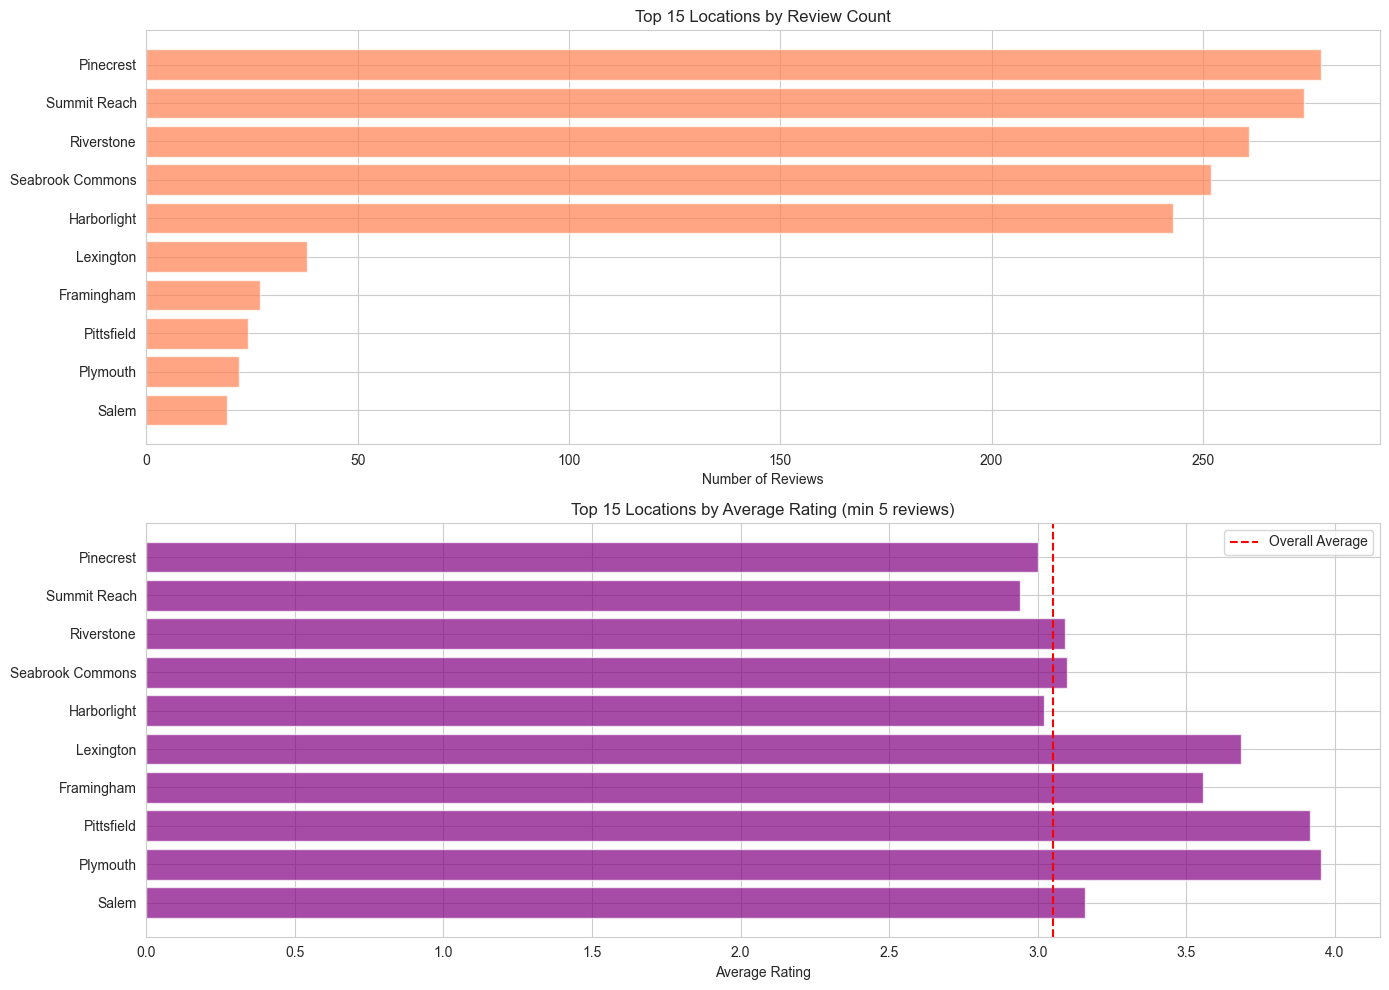

In [7]:
# Location analysis
location_counts = df['location'].value_counts().head(15)

print(f"Total unique locations: {df['location'].nunique()}")
print(f"\nTop 15 Locations by Review Count:")
print(location_counts)

# Average rating by location
location_ratings = df.groupby('location')['rating'].agg(['mean', 'count']).sort_values('count', ascending=False).head(15)
location_ratings.columns = ['avg_rating', 'review_count']

print(f"\nTop 15 Locations by Review Count with Average Ratings:")
print(location_ratings)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Review count by location
axes[0].barh(range(len(location_counts)), location_counts.values, color='coral', alpha=0.7)
axes[0].set_yticks(range(len(location_counts)))
axes[0].set_yticklabels(location_counts.index)
axes[0].set_xlabel('Number of Reviews')
axes[0].set_title('Top 15 Locations by Review Count')
axes[0].invert_yaxis()

# Average rating by location (for locations with at least 5 reviews)
location_ratings_filtered = location_ratings[location_ratings['review_count'] >= 5].head(15)
axes[1].barh(range(len(location_ratings_filtered)), location_ratings_filtered['avg_rating'].values, 
             color='purple', alpha=0.7)
axes[1].set_yticks(range(len(location_ratings_filtered)))
axes[1].set_yticklabels(location_ratings_filtered.index)
axes[1].set_xlabel('Average Rating')
axes[1].set_title('Top 15 Locations by Average Rating (min 5 reviews)')
axes[1].axvline(x=df['rating'].mean(), color='red', linestyle='--', label='Overall Average')
axes[1].legend()
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


## 4. Text Analysis - Keywords and Themes


Total words analyzed: 29666

Top 30 Most Common Words:
ymca: 1686
felt: 783
great: 632
aqua: 549
session: 442
cardio: 390
loved: 377
summit: 363
reach: 363
pinecrest: 362
easy: 360
parking: 348
riverstone: 327
seabrook: 325
commons: 325
class: 317
harborlight: 309
vibe: 294
line: 290
check: 275
well: 273
come: 256
back: 256
staff: 253
there: 253
schedule: 252
lexington: 236
time: 234
pittsfield: 225
took: 213


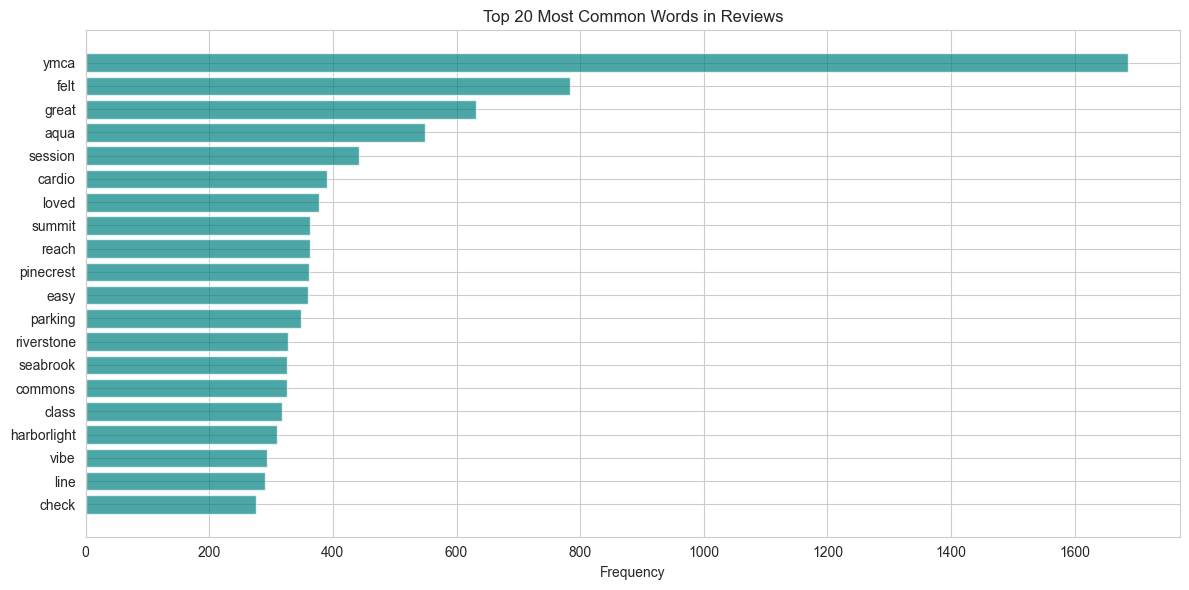

In [8]:
# Text analysis
import string
from collections import Counter

# Combine all review texts
all_text = ' '.join(df['review_text'].dropna().astype(str))

# Common words (excluding stop words and common terms)
stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'was', 'were', 'is', 'are', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'my', 'your', 'his', 'her', 'its', 'our', 'their'}

# Extract words
words = re.findall(r'\b[a-z]+\b', all_text.lower())
words = [w for w in words if w not in stop_words and len(w) > 3]
word_counts = Counter(words)

print(f"Total words analyzed: {len(words)}")
print(f"\nTop 30 Most Common Words:")
for word, count in word_counts.most_common(30):
    print(f"{word}: {count}")

# Visualization
top_words = dict(word_counts.most_common(20))
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_words)), list(top_words.values()), color='teal', alpha=0.7)
plt.yticks(range(len(top_words)), list(top_words.keys()))
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words in Reviews')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 5. Review Length Analysis by Rating


Average Review Length by Rating:
        review_length  word_count
rating                           
1          134.140756   21.035714
2          135.140665   21.104859
3          141.174468   23.378723
4          146.627841   24.355114
5          146.038462   24.131868


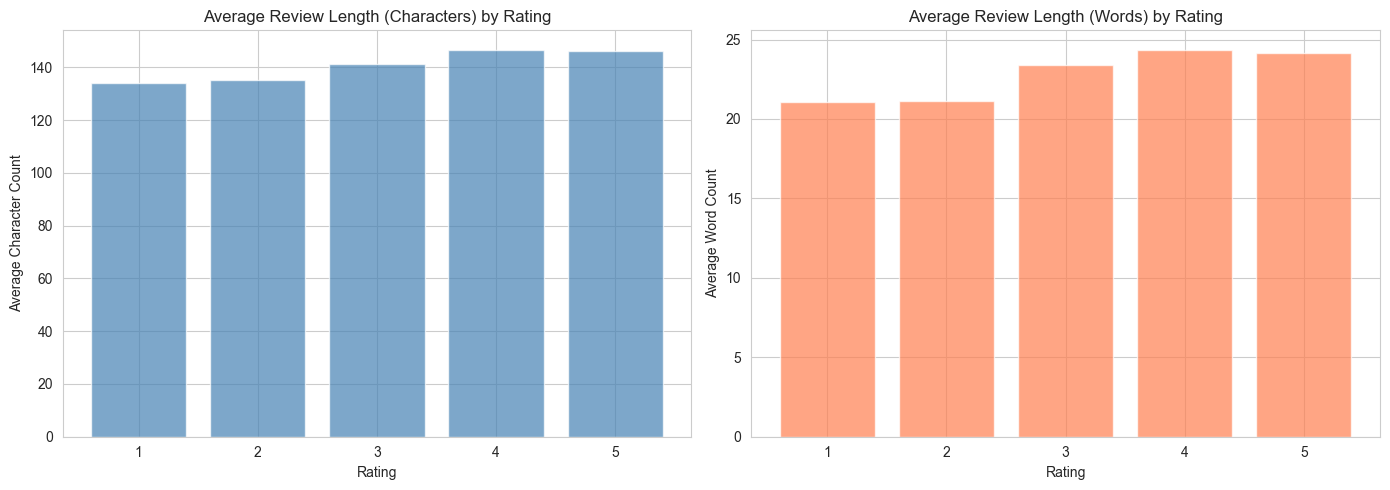


Sample Reviews by Rating:

1 stars: POWER HOUR at Summit Reach YMCA in Pittsfield was disappointing—the facility felt busy and a bit chaotic. Not sure I’d return. Parking was a hassle....

2 stars: Harborlight YMCA felt off during SALSA / LATIN DANCE: it started late and felt rushed. Would prefer smaller groups....

3 stars: BEGINNER DRAWING at Harborlight YMCA in Salem was okay. good for a first try, not sure it’s my favorite Might try a different time slot. Might try the...

4 stars: Riverstone YMCA nailed it with SENIOR CIRCUITS. the pacing was great and I left feeling energized Great energy and well-run session. Nice mix of ages ...

5 stars: If you're in Lexington, try BEGINNER COOKING at Pinecrest YMCA. the pacing was great and I left feeling energized Easy 5 stars. Great for families....


In [9]:
# Analyze review length and content by rating
df['review_length'] = df['review_text'].str.len()
df['word_count'] = df['review_text'].str.split().str.len()

# Review length by rating
length_by_rating = df.groupby('rating')[['review_length', 'word_count']].mean()

print("Average Review Length by Rating:")
print(length_by_rating)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character length by rating
axes[0].bar(length_by_rating.index, length_by_rating['review_length'], color='steelblue', alpha=0.7)
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Average Character Count')
axes[0].set_title('Average Review Length (Characters) by Rating')
axes[0].set_xticks(length_by_rating.index)

# Word count by rating
axes[1].bar(length_by_rating.index, length_by_rating['word_count'], color='coral', alpha=0.7)
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Average Word Count')
axes[1].set_title('Average Review Length (Words) by Rating')
axes[1].set_xticks(length_by_rating.index)

plt.tight_layout()
plt.show()

# Sample reviews by rating
print("\nSample Reviews by Rating:")
for rating in sorted(df['rating'].dropna().unique()):
    sample = df[df['rating'] == rating]['review_text'].iloc[0] if len(df[df['rating'] == rating]) > 0 else None
    if sample:
        print(f"\n{rating} stars: {sample[:150]}...")


## 6. Event Type and Location Cross-Analysis


In [10]:
# Cross-analysis: Event type vs Location
# Get top event types and locations
top_events = df['event_type'].value_counts().head(10).index
top_locations = df['location'].value_counts().head(10).index

cross_tab = pd.crosstab(df['event_type'], df['location'], margins=True)
cross_tab_filtered = cross_tab.loc[list(top_events) + ['All'], list(top_locations) + ['All']]

print("Event Type vs Location Cross-Tabulation (Top 10x10):")
print(cross_tab_filtered)

# Heatmap
plt.figure(figsize=(14, 8))
cross_tab_heatmap = pd.crosstab(df['event_type'], df['location'])
cross_tab_heatmap_filtered = cross_tab_heatmap.loc[list(top_events), list(top_locations)]
sns.heatmap(cross_tab_heatmap_filtered, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Review Count'})
plt.title('Event Type vs Location Heatmap (Top 10x10)')
plt.xlabel('Location')
plt.ylabel('Event Type')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


KeyError: "['Lexington', 'Framingham', 'Pittsfield', 'Plymouth', 'Salem'] not in index"

## 7. Key Insights Summary


In [ ]:
# Generate summary insights
print("=" * 60)
print("KEY INSIGHTS SUMMARY")
print("=" * 60)

print(f"\n1. Overall Statistics:")
print(f"   - Total Reviews: {len(df)}")
print(f"   - Average Rating: {df['rating'].mean():.2f}")
print(f"   - Unique Event Types: {df['event_type'].nunique()}")
print(f"   - Unique Locations: {df['location'].nunique()}")

print(f"\n2. Top Performing Event Types (by average rating, min 10 reviews):")
top_rated_events = df.groupby('event_type')['rating'].agg(['mean', 'count'])
top_rated_events = top_rated_events[top_rated_events['count'] >= 10].sort_values('mean', ascending=False).head(5)
for event, row in top_rated_events.iterrows():
    print(f"   - {event}: {row['mean']:.2f} stars ({int(row['count'])} reviews)")

print(f"\n3. Most Reviewed Event Types:")
most_reviewed = df['event_type'].value_counts().head(5)
for event, count in most_reviewed.items():
    avg_rating = df[df['event_type'] == event]['rating'].mean()
    print(f"   - {event}: {count} reviews (avg: {avg_rating:.2f} stars)")

print(f"\n4. Top Locations (by review count):")
top_locations = df['location'].value_counts().head(5)
for location, count in top_locations.items():
    avg_rating = df[df['location'] == location]['rating'].mean()
    print(f"   - {location}: {count} reviews (avg: {avg_rating:.2f} stars)")

print(f"\n5. Rating Distribution:")
for rating in sorted(df['rating'].dropna().unique()):
    count = len(df[df['rating'] == rating])
    pct = (count / len(df)) * 100
    print(f"   - {rating} stars: {count} reviews ({pct:.1f}%)")

print("\n" + "=" * 60)


KEY INSIGHTS SUMMARY

1. Overall Statistics:
   - Total Reviews: 2000
   - Average Rating: 3.05
   - Unique Event Types: 19
   - Unique Locations: 10

2. Top Performing Event Types (by average rating, min 10 reviews):
   - AQUA INTERVALS: 3.68 stars (25 reviews)
   - CARDIO STRENGTH: 3.24 stars (68 reviews)
   - AQUA FIT: 3.22 stars (60 reviews)
   - CARDIO DANCE: 3.19 stars (52 reviews)
   - AQUA PILATES: 3.15 stars (67 reviews)

3. Most Reviewed Event Types:
   - ARTHRITIS AQUA FITNESS: 75 reviews (avg: 2.84 stars)
   - STRENGTH: 72 reviews (avg: 3.10 stars)
   - SALSA / LATIN DANCE: 71 reviews (avg: 2.94 stars)
   - AQUA ZUMBA: 71 reviews (avg: 3.08 stars)
   - SENIOR CIRCUITS: 71 reviews (avg: 3.10 stars)

4. Top Locations (by review count):
   - Pinecrest: 278 reviews (avg: 3.00 stars)
   - Summit Reach: 274 reviews (avg: 2.94 stars)
   - Riverstone: 261 reviews (avg: 3.09 stars)
   - Seabrook Commons: 252 reviews (avg: 3.10 stars)
   - Harborlight: 243 reviews (avg: 3.02 stars)



## 8. Export Analysis Results


In [ ]:
# Export processed data and summaries
output_dir = os.path.join(project_root, "notebooks", "analysis_output")
os.makedirs(output_dir, exist_ok=True)

# Export processed dataframe
df.to_csv(os.path.join(output_dir, "reviews_processed.csv"), index=False)
print(f"Exported processed data to: {os.path.join(output_dir, 'reviews_processed.csv')}")

# Export event type summary
event_summary = df.groupby('event_type')['rating'].agg(['mean', 'count', 'std']).sort_values('count', ascending=False)
event_summary.columns = ['avg_rating', 'review_count', 'rating_std']
event_summary.to_csv(os.path.join(output_dir, "event_type_summary.csv"))
print(f"Exported event type summary to: {os.path.join(output_dir, 'event_type_summary.csv')}")

# Export location summary
location_summary = df.groupby('location')['rating'].agg(['mean', 'count', 'std']).sort_values('count', ascending=False)
location_summary.columns = ['avg_rating', 'review_count', 'rating_std']
location_summary.to_csv(os.path.join(output_dir, "location_summary.csv"))
print(f"Exported location summary to: {os.path.join(output_dir, 'location_summary.csv')}")

print(f"\nAll analysis results exported to: {output_dir}")
